In [1]:
# package import

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pandas as pd
import scipy as sp
import sklearn as sk
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
import pickle as pkl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

# set wd

os.chdir("\\Users\\madel\\Documents\\Grad School\\Classes\\Fall 2020\\ECE532\\Final Project")
os.getcwd() # sets wd
#os.listdir(os.getcwd()) # lists files in wd

'C:\\Users\\madel\\Documents\\Grad School\\Classes\\Fall 2020\\ECE532\\Final Project'

In [6]:
# import data
reddf = pd.read_csv("winequality-red.csv",delimiter=';')
whitedf = pd.read_csv("winequality-white.csv",delimiter=';')

# add color label
reddf['color'] = str('red')
whitedf['color']=str('white')
    
# stack df's 
fulldf = pd.concat([reddf, whitedf], ignore_index=True)
#fulldf.head()
#fulldf.tail()

In [7]:
## Preprocessing: Format Data ##

# encode color as numbers using sk preprocessing
le = preprocessing.LabelEncoder()
encoded_color = le.fit_transform(fulldf['color'])
print(encoded_color)
## red = 0 and white = 1

[0 0 0 ... 1 1 1]


In [9]:
# create working df where color codes are used
colorcodes = encoded_color.tolist()
workingdf = fulldf.drop('color', axis=1)
#workingdf.head()
workingdf['color']=colorcodes
#workingdf.head()

In [56]:
# scale and transform the data

# scaling will help with regularization
# each parameter will be scaled between 0 and 1
X=workingdf
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf=pd.DataFrame(scaler.transform(X))
y=scaleddf[11].reset_index(drop=True) # this is the quality column

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0


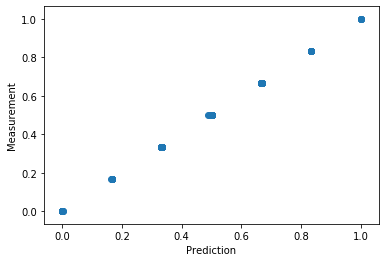

In [49]:
#Try simple linear regression to test that data is correctly formatted (Should look like a line)
trainingdata=X
clf = linear_model.LinearRegression(fit_intercept=False) #This defines the form of the model you are trying to fit (linear_model) and the optimization method (none for now)
clf.fit(trainingdata,y) 
prediction=clf.predict(trainingdata) 
plt.scatter(prediction,y) 
plt.xlabel('Prediction')
plt.ylabel('Measurement')
plt.show()
plt.close()

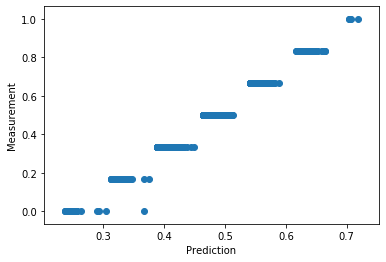

In [50]:
#Try lasso with high alpha to test that data is correctly formatted (should look like a bit noisier line)
trainingdata=X
clf = linear_model.Lasso(alpha=0.1,fit_intercept=False,max_iter=100000)
clf.fit(trainingdata,y) 
prediction=clf.predict(trainingdata)
plt.scatter(prediction,y) 
plt.xlabel('Prediction')
plt.ylabel('Measurement')
plt.show()
plt.close()

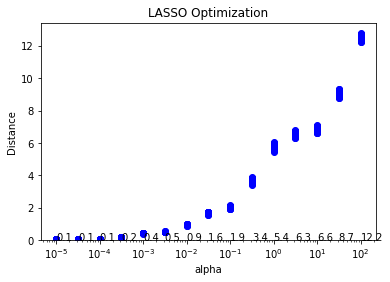

In [57]:
#Find the best lambda for lasso regression by doing cross validation
alphas=np.logspace(-5,2,15)
for a in alphas:
    distances=[]
    for k in range(30): 
        trainingdata=X.sample(frac=0.9, random_state=k).sort_index() 
        testdata=X.drop(trainingdata.index) 
        clf = linear_model.Lasso(alpha=a,fit_intercept=False,max_iter=100000) 
        clf.fit(trainingdata,y.drop(testdata.index)) 
        prediction=clf.predict(testdata) 
        dist=np.linalg.norm(prediction-y.drop(trainingdata.index))
        plt.plot(a,dist,'bo') 
        distances.append(dist)
    plt.text(a,0,'%.1f' % min(distances))
plt.xlabel('alpha')
plt.ylabel('Distance')
plt.title('LASSO Optimization')
plt.xscale('log')
plt.ylim(bottom=0)
#plt.savefig('linear_regression_lasso_optimization.png')
plt.show()
plt.close()

y=1.2385287521351074x+-0.11569180562578552, r=0.9869376423371652, p=0.0, n=6497


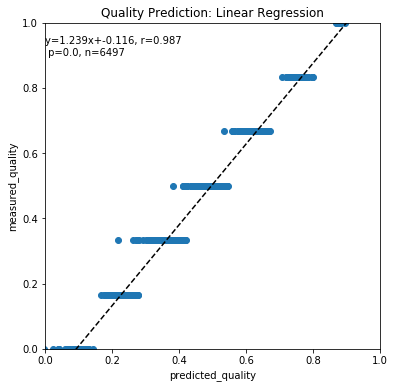

In [58]:
# Try with a lambda somewhere in the middle
# Did not expect the distance to converge to zero
plt.figure(figsize=(6,6))
alpha=0.01

#Here the training data and the test data are the same, so the plot is just showing how well the model fits the data
trainingdata=X
testdata=X
clf = linear_model.Lasso(alpha=alpha,fit_intercept=False,max_iter=10000) #Create model object
clf.fit(trainingdata,y) 
prediction=clf.predict(testdata) 
m,slope,r,p,stderr=sp.stats.linregress(prediction,y)
print('y='+str(m)+'x+'+str(slope)+', r='+str(r)+', p='+str(p)+', n='+str(len(prediction)))
plt.plot(prediction,y,linestyle='',marker='o')
z=np.linspace(0,7500,100)
plt.plot(z,m*z+slope,linestyle='dashed',color='k')
plt.title('Quality Prediction: Linear Regression')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('predicted_quality')
plt.ylabel('measured_quality')
plt.annotate('y='+str(np.round(m,3))+
             'x+'+str(np.round(slope,3))+', r='+str(np.round(r,3))+
             '\n p='+str(p)+', n='+str(len(prediction)),(0,.90), 
             xycoords='axes fraction')
#plt.savefig('linear_regression_godnessoffit_wholeset.png')
plt.show()
plt.close()

In [40]:
workingdf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [5]:
## Holdout evaluation ##

## scale and transform the data
X=workingdf
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf = pd.DataFrame(scaler.transform(X))
scaleddf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0


In [6]:
## split the data 80/20
finaltraindata = scaleddf.sample(frac=0.8).sort_index() 
evaldata_X = scaleddf.drop(finaltraindata.index) # define final eval data as everything but the training data
evaldata_Y = evaldata_X[11] # define the final eval labels as the quality column
evaldata_X = evaldata_X.drop(11, axis=1) # define the final eval data as everything but quality in the holdout set

# define target as the training data's quality ratings
target = finaltraindata[11] # after scaling, column names were given numbers

# define data as the scaled training set, drop quality
data = finaltraindata.drop(11, axis=1)

y=0.6655641295255917x+0.17857919771783054, r=0.4043857986835401, p=2.7969020380484993e-52, n=1299


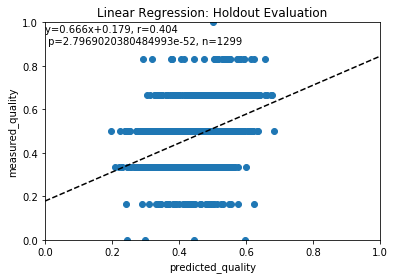

In [13]:
## holdout evaluation

clf = linear_model.Lasso(alpha=0.01,fit_intercept=False,max_iter=10000) # lambda from above
clf.fit(data,target) 
y_pred=clf.predict(evaldata_X) 
m,slope,r,p,stderr=sp.stats.linregress(y_pred,evaldata_Y)
print('y='+str(m)+'x+'+str(slope)+', r='+str(r)+', p='+str(p)+', n='+str(len(y_pred)))
plt.scatter(y_pred,evaldata_Y)
z=np.linspace(0,1,100)
plt.plot(z,m*z+slope,linestyle='dashed',color='k')
plt.title('Linear Regression: Holdout Evaluation')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('predicted_quality')
plt.ylabel('measured_quality')
plt.annotate('y='+str(np.round(m,3))+
             'x+'+str(np.round(slope,3))+', r='+str(np.round(r,3))+
             '\n p='+str(p)+', n='+str(len(y_pred)),(0,.90), 
             xycoords='axes fraction')
#plt.savefig('linear_regression_holdout_evaluation.png')
plt.show()
plt.close()

In [11]:
### 2. Separate Reds and Whites, Repeat ###

reddf = workingdf[workingdf['color']==0]
whitedf = workingdf[workingdf['color']==1]

In [22]:
# scale and transform the data

# scaling will help with regularization
# each parameter will be scaled between 0 and 1
X=reddf
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf=pd.DataFrame(scaler.transform(X))
y=scaleddf[11].reset_index(drop=True) # this is the quality column

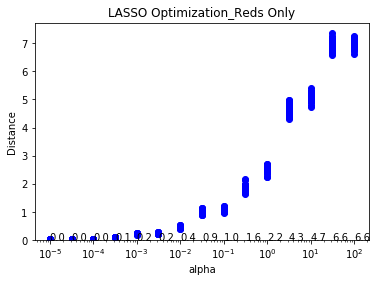

In [24]:
#Find the best lambda for lasso regression by doing cross validation
alphas=np.logspace(-5,2,15)
for a in alphas:
    distances=[]
    for k in range(30): 
        trainingdata=X.sample(frac=0.9).sort_index() 
        testdata=X.drop(trainingdata.index) 
        clf = linear_model.Lasso(alpha=a,fit_intercept=False,max_iter=100000) 
        clf.fit(trainingdata,y.drop(testdata.index)) 
        prediction=clf.predict(testdata) 
        dist=np.linalg.norm(prediction-y.drop(trainingdata.index))
        plt.plot(a,dist,'bo') 
        distances.append(dist)
    plt.text(a,0,'%.1f' % min(distances))
plt.xlabel('alpha')
plt.ylabel('Distance')
plt.title('LASSO Optimization_Reds Only')
plt.xscale('log')
plt.ylim(bottom=0)
#plt.savefig('linear_regression_lasso_optimization_reds.png')
plt.show()
plt.close()

In [25]:
## Holdout evaluation ##

## split the data 80/20
finaltraindata = scaleddf.sample(frac=0.8).sort_index() 
evaldata_X = scaleddf.drop(finaltraindata.index) # define final eval data as everything but the training data
evaldata_Y = evaldata_X[11] # define the final eval labels as the quality column
evaldata_X = evaldata_X.drop(11, axis=1) # define the final eval data as everything but quality in the holdout set

# define target as the training data's quality ratings
target = finaltraindata[11] # after scaling, column names were given numbers

# define data as the scaled training set, drop quality
data = finaltraindata.drop(11, axis=1)

y=0.7580882114105162x+0.13482929540471755, r=0.4386452662040977, p=1.7625292726945365e-16, n=320


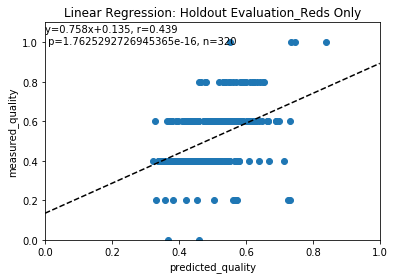

In [27]:
## holdout evaluation

clf = linear_model.Lasso(alpha=0.01,fit_intercept=False,max_iter=10000) # lambda from above
clf.fit(data,target) 
y_pred=clf.predict(evaldata_X) 
m,slope,r,p,stderr=sp.stats.linregress(y_pred,evaldata_Y)
print('y='+str(m)+'x+'+str(slope)+', r='+str(r)+', p='+str(p)+', n='+str(len(y_pred)))
plt.scatter(y_pred,evaldata_Y)
z=np.linspace(0,1,100)
plt.plot(z,m*z+slope,linestyle='dashed',color='k')
plt.title('Linear Regression: Holdout Evaluation_Reds Only')
plt.xlim(0,1)
plt.ylim(0,1.1)
plt.xlabel('predicted_quality')
plt.ylabel('measured_quality')
plt.annotate('y='+str(np.round(m,3))+
             'x+'+str(np.round(slope,3))+', r='+str(np.round(r,3))+
             '\n p='+str(p)+', n='+str(len(y_pred)),(0,.90), 
             xycoords='axes fraction')
#plt.savefig('linear_regression_holdout_evaluation_reds_only.png')
plt.show()
plt.close()

In [23]:
## White Wines Only ###

# scale and transform the data

# scaling will help with regularization
# each parameter will be scaled between 0 and 1
X=whitedf
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf=pd.DataFrame(scaler.transform(X))
y=scaleddf[11].reset_index(drop=True) # this is the quality column
#scaleddf.head()

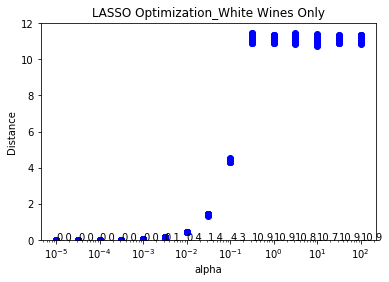

In [24]:
#Find the best lambda for lasso regression by doing cross validation
alphas=np.logspace(-5,2,15)
for a in alphas:
    distances=[]
    for k in range(30): 
        trainingdata=scaleddf.sample(frac=0.9).sort_index() 
        testdata=scaleddf.drop(trainingdata.index, axis=0) 
        clf = linear_model.Lasso(alpha=a,fit_intercept=False,max_iter=100000) 
        clf.fit(trainingdata,trainingdata[11]) 
        prediction=clf.predict(testdata) 
        dist=np.linalg.norm(prediction-y.drop(trainingdata.index))
        plt.plot(a,dist,'bo') 
        distances.append(dist)
    plt.text(a,0,'%.1f' % min(distances))
plt.xlabel('alpha')
plt.ylabel('Distance')
plt.title('LASSO Optimization_White Wines Only')
plt.xscale('log')
plt.ylim(bottom=0)
#plt.savefig('linear_regression_lasso_optimization_whites.png')
plt.show()
plt.close()

In [25]:
## Holdout evaluation ##

## split the data 80/20
finaltraindata = scaleddf.sample(frac=0.8).sort_index() 
evaldata_X = scaleddf.drop(finaltraindata.index) # define final eval data as everything but the training data
evaldata_Y = evaldata_X[11] # define the final eval labels as the quality column
evaldata_X = evaldata_X.drop(11, axis=1) # define the final eval data as everything but quality in the holdout set

# define target as the training data's quality ratings
target = finaltraindata[11] # after scaling, column names were given numbers

# define data as the scaled training set, drop quality
data = finaltraindata.drop(11, axis=1)

y=0.6039791527924805x+0.20176739153913242, r=0.4005431437827214, p=4.6167299984092514e-39, n=980


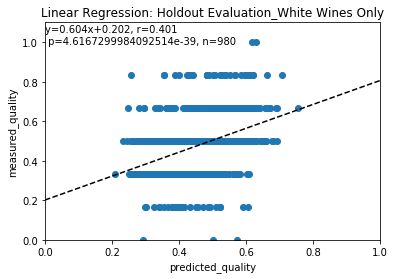

In [27]:
## holdout evaluation

clf = linear_model.Lasso(alpha=0.01,fit_intercept=False,max_iter=10000) # lambda from above
clf.fit(data,target) 
y_pred=clf.predict(evaldata_X) 
m,slope,r,p,stderr=sp.stats.linregress(y_pred,evaldata_Y)
print('y='+str(m)+'x+'+str(slope)+', r='+str(r)+', p='+str(p)+', n='+str(len(y_pred)))
plt.scatter(y_pred,evaldata_Y)
z=np.linspace(0,1,100)
plt.plot(z,m*z+slope,linestyle='dashed',color='k')
plt.title('Linear Regression: Holdout Evaluation_White Wines Only')
plt.xlim(0,1)
plt.ylim(0,1.1)
plt.xlabel('predicted_quality')
plt.ylabel('measured_quality')
plt.annotate('y='+str(np.round(m,3))+
             'x+'+str(np.round(slope,3))+', r='+str(np.round(r,3))+
             '\n p='+str(p)+', n='+str(len(y_pred)),(0,.90), 
             xycoords='axes fraction')
plt.savefig('linear_regression_holdout_evaluation_whites_only.png')
plt.show()
plt.close()